## Install Dependencies and Download Weights

* Selected Python Version: 3.11.9

In [20]:
!git clone -b PicAxe_YOLO https://github.com/acguerr1/imageextraction.git

Cloning into 'imageextraction'...
remote: Enumerating objects: 377, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 377 (delta 96), reused 190 (delta 71), pack-reused 140 (from 1)
Receiving objects: 100% (377/377), 131.54 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (124/124), done.


* Switch to current project directory "imageextraction"

In [4]:
!python -m pip install gdown
!gdown --no-check-certificate --folder "https://drive.google.com/drive/folders/1PiPbbhUsw95kdpfAmKlm6Xq1RfcIuu3p?usp=sharing"

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Retrieving folder contents
/Users/qilinzhou/Downloads/imageextraction/.venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Processing file 1caObACbvxJ8hPx4KPQ5E5sR4Ss0pXyle figure_sensitive.pt
Processing file 1g9lwMVw2bbQEoo5zUBr4JCDNMfrmRnBk table_sensitive.pt
Retrievi

In [24]:
!python -m pip install -r "requirements.txt"

In [10]:
!brew install zbar
!brew install poppler

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
cmrc                firefly             slackdump           spoofdpi
==> New Casks
font-lxgw-simxihei         microsoft-openjdk@21       photostickies
font-lxgw-simzhisong       neo-network-utility        retcon
font-server-mono           oxygen-xml-developer

You have 5 outdated formulae installed.

To reinstall 0.23.93, run:
  brew reinstall zbar
==> Downloading https://ghcr.io/v2/homebrew/core/poppler/manifests/24.04.0_1
######################################################################### 100.0%
==> Fetching dependencies for poppler: libx11, gmp, libtasn1, nettle, p11-kit, libevent, libnghttp2, unbound, gnutls, libgpg-error, libassuan, libgcrypt, libksba, libusb, npth, pinentry

* Figure and Table Extraction

I select combined mode this case to optimize the recall for both table and figure extraction.

In [26]:
!python yolo_detection.py --input_dir "sample_papers" --output_dir "sample_outputs" --combined 

2024-08-29 13:46:31.356482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Processing PDFs:   0%|                                  | 0/5 [00:00<?, ?file/s]Processing file: WhiteBorisy1983.pdf
Detected and saved: WhiteBorisy1983_page_6_image_1.png
Detected and saved: WhiteBorisy1983_page_7_image_1.png
Detected and saved: WhiteBorisy1983_page_8_image_1.png
Detected and saved: WhiteBorisy1983_page_9_image_1.png
Detected and saved: WhiteBorisy1983_page_10_image_1.png
Detected and saved: WhiteBorisy1983_page_11_image_1.png
Detected and saved: WhiteBorisy1983_page_12_image_1.png
Detected and saved: WhiteBorisy1983_page_13_image_1.png
Detected and saved: WhiteBorisy1983_page_13_image_2.png
Detected and saved: WhiteBorisy1983_page_14_image_1.png
Detected and sa

We can see with L4GPU, for five PDFs, it took only 1 minute and 32 seconds.

* Visualize the results

I randomly select 5 for visualization.

In [15]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
image_folder = "sample_outputs"
image_files = [
    os.path.join(image_folder, file)
    for file in os.listdir(image_folder)
    if file.endswith(".png")
]

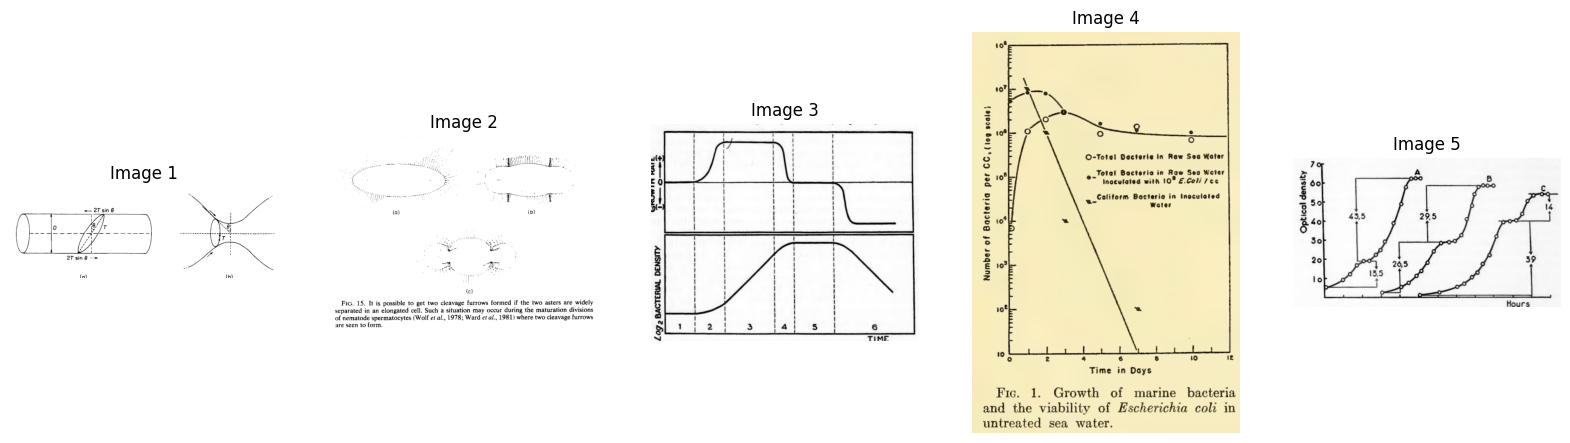

In [22]:
selected_images = random.sample(image_files, 5)
plt.figure(figsize=(20, 10))

for i, image_file in enumerate(selected_images):
    img = Image.open(image_file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")
plt.show()